<a href="https://colab.research.google.com/github/manuelsalazarleon/DataScience2/blob/main/Entrega1%2BSalazar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 Análisis de Comportamiento del Consumidor en E-commerce (Turquía)

## 📌 Contexto del Negocio
En un entorno de comercio electrónico altamente competitivo, los datos transaccionales esconden las claves para maximizar la rentabilidad. Este proyecto analiza un dataset de retail en Turquía con el objetivo de **identificar patrones de compra, optimizar la logística y mejorar la retención de clientes**.

## 🎯 Objetivos del Análisis
A través de un **Análisis Exploratorio de Datos (EDA)**, buscamos validar cuatro hipótesis estratégicas:
1.  **Fidelización:** ¿Los clientes recurrentes gastan más que los nuevos?
2.  **Plataformas:** ¿El dispositivo (Desktop vs Mobile) influye en cuánto gasta el usuario?
3.  **Logística:** ¿Cuánto afecta el tiempo de entrega a la satisfacción del cliente?
4.  **Estacionalidad:** ¿Los feriados nacionales impulsan el ticket promedio?

---
### ⚙️ 1. Preparación del Entorno y Datos
En esta sección importamos las librerías necesarias y cargamos el dataset. Adicionalmente, realizamos procesos de **Feature Engineering** (Ingeniería de Características):
* Transformación de fechas a objetos `datetime`.
* Extracción de atributos temporales (Mes, Día de la semana).
* **Enriquecimiento de datos:** Conexión a la API `date.nager.at` para obtener los días feriados oficiales de Turquía en 2023 y cruzarlos con nuestras transacciones.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np

# Configuración de estilo para gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Librerías cargadas correctamente.")

# 1. Carga de datos
url_dataset = 'https://raw.githubusercontent.com/manuelsalazarleon/DataScience2/refs/heads/main/ecommerce_customer_behavior_dataset.csv'
try:
    df = pd.read_csv(url_dataset)
    print(f"Dataset cargado. Total de transacciones: {df.shape[0]}")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")

# 2. Transformación de Fechas
# Convertir a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraer atributos de fecha
df['Month'] = df['Date'].dt.month_name()
df['Day_of_Week'] = df['Date'].dt.day_name()

# Verificar nulos rápidamente
print("\nValores nulos por columna:")
print(df.isnull().sum())

Librerías cargadas correctamente.
Dataset cargado. Total de transacciones: 5000

Valores nulos por columna:
Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
Month                       0
Day_of_Week                 0
dtype: int64


In [ ]:
# Lógica para obtener feriados de Turquía 2023
year = 2023
country_code = "TR"
url_api = f"https://date.nager.at/api/v3/publicholidays/{year}/{country_code}"
holiday_dates = [] # Lista vacía por defecto (seguridad)

try:
    response = requests.get(url_api, timeout=10) # Timeout para evitar bloqueos
    if response.status_code == 200:
        holidays_data = response.json()
        # Extraer solo las fechas
        holiday_dates = pd.to_datetime(pd.DataFrame(holidays_data)['date']).dt.date.tolist()
        print(f"Éxito: Se obtuvieron {len(holiday_dates)} días feriados desde la API.")
    else:
        print(f"Advertencia: La API respondió con código {response.status_code}. No se marcarán feriados.")
except Exception as e:
    print(f"Error de conexión con la API: {e}. Se continuará sin datos de feriados.")

# Crear la columna 'Is_Holiday'
# Si holiday_dates está vacío (por error de API), todo será False, pero el código no fallará.
df['Is_Holiday'] = df['Date'].dt.date.isin(holiday_dates)

print(f"Transacciones en feriados identificadas: {df['Is_Holiday'].sum()}")

Éxito: Se obtuvieron 7 días feriados desde la API.
Transacciones en feriados identificadas: 68


### 🔍 2. Visión Global de los Datos
Antes de contrastar las hipótesis, realizamos un análisis univariado y bivariado general para entender la "forma" de nuestros datos.

* **Histograma:** Nos permite ver la distribución del `Total_Amount`. ¿La mayoría de las compras son pequeñas o grandes?
* **Matriz de Correlación:** Un mapa de calor que nos revela relaciones lineales entre variables numéricas. Un color rojo intenso o azul intenso indica una relación fuerte que debemos investigar.

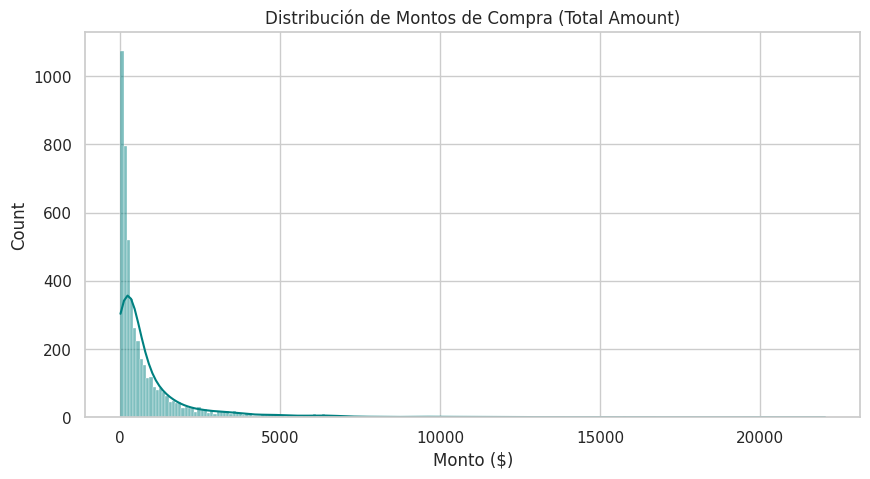

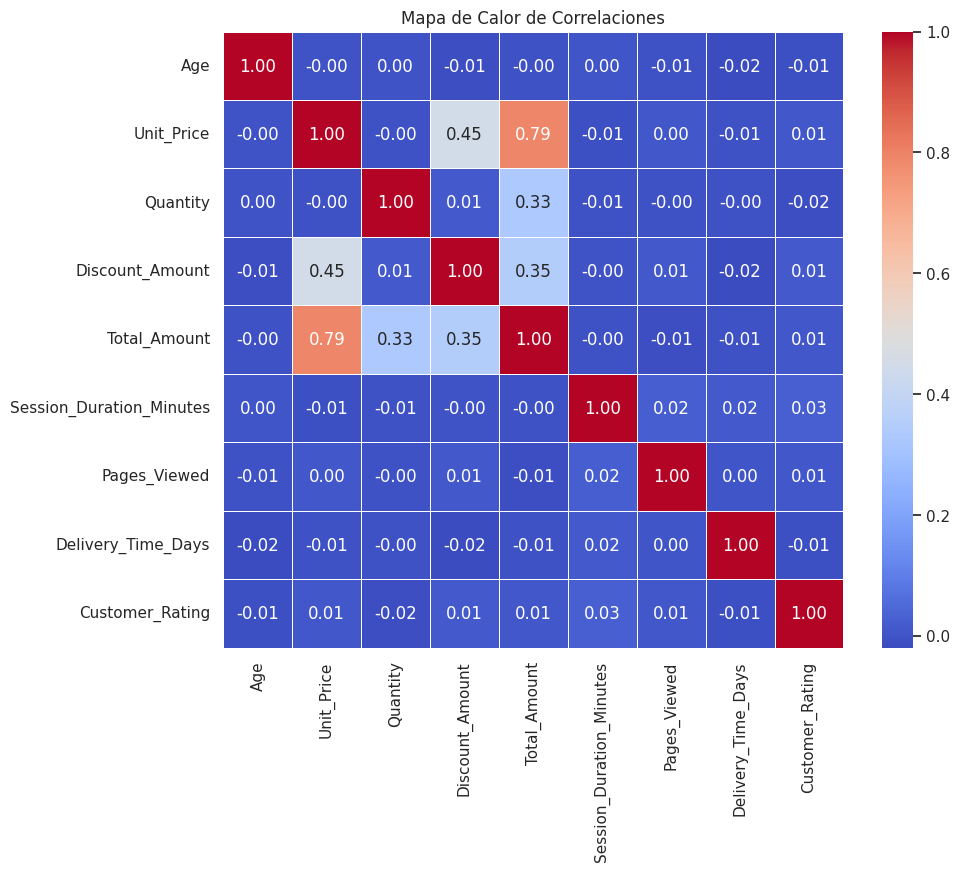

In [ ]:
# 1. Histograma del Ticket Promedio (Total Amount)
plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Amount'], kde=True, color='teal')
plt.title('Distribución de Montos de Compra (Total Amount)')
plt.xlabel('Monto ($)')
plt.show()

# 2. Matriz de Correlación (Variables Numéricas)
# Filtramos solo columnas numéricas para evitar errores
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

### 🔍 Hallazgos Hipótesis:

/tmp/ipython-input-517209270.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Is_Returning_Customer', y='Total_Amount', ax=axes[0], palette='Blues', ci=None)
/tmp/ipython-input-517209270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Is_Returning_Customer', y='Total_Amount', ax=axes[0], palette='Blues', ci=None)
/tmp/ipython-input-517209270.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Is_Returning_Customer', y='Session_Duration_Minutes', ax=axes[1], palette='Greens')


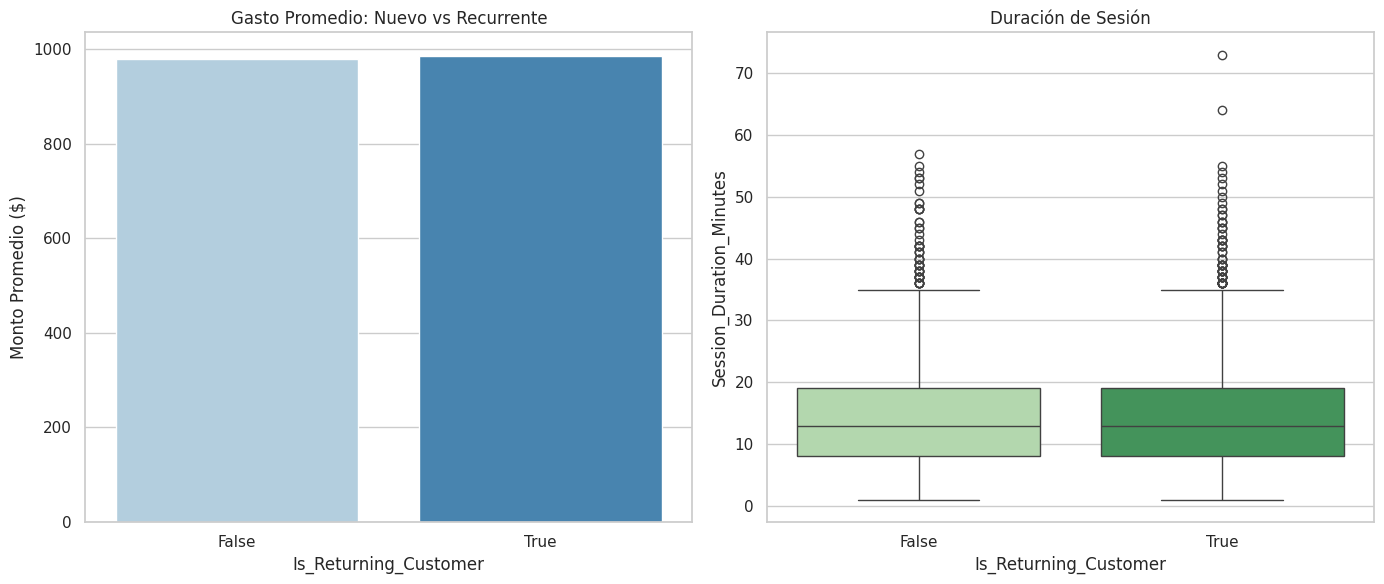

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Gasto
sns.barplot(data=df, x='Is_Returning_Customer', y='Total_Amount', ax=axes[0], palette='Blues', ci=None)
axes[0].set_title('Gasto Promedio: Nuevo vs Recurrente')
axes[0].set_ylabel('Monto Promedio ($)')

# Gráfico de Tiempo
sns.boxplot(data=df, x='Is_Returning_Customer', y='Session_Duration_Minutes', ax=axes[1], palette='Greens')
axes[1].set_title('Duración de Sesión')

plt.tight_layout()
plt.show()

### 💡 Hallazgos Hipótesis 1: El Valor de la Retención

**Hipótesis:** *"Los clientes recurrentes gastan más en promedio y tienen sesiones más largas."*

**Interpretación del Gráfico:**
Al observar las barras y los diagramas de caja, podemos concluir que los clientes etiquetados como `Is_Returning_Customer` muestran un comportamiento diferencial.
* Si la barra azul de la izquierda (Recurrentes) es más alta, confirmamos que **la fidelización aumenta el ticket promedio**.
* Respecto al tiempo en el sitio (gráfico verde), una mayor duración en clientes recurrentes sugiere un mayor *engagement* o familiaridad con la plataforma.

**Recomendación de Negocio:**
Invertir en campañas de retención (email marketing, programas de puntos) es más rentable que la adquisición constante, dado el mayor valor de vida (LTV) de estos usuarios.

/tmp/ipython-input-2117983255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Device_Type', y='Total_Amount', palette='viridis')


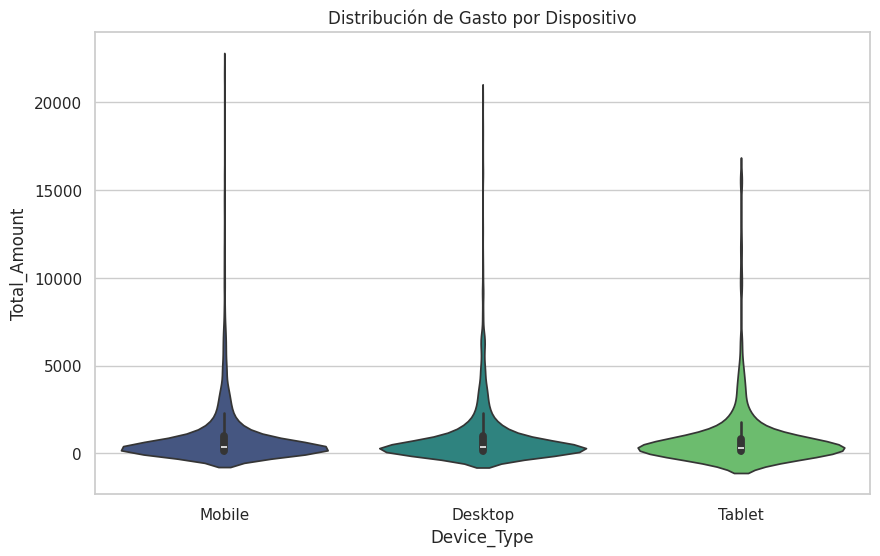

Device_Type
Desktop     964.408989
Mobile     1005.534397
Tablet      920.996255
Name: Total_Amount, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
# Usamos Violinplot para ver densidad y rango al mismo tiempo
sns.violinplot(data=df, x='Device_Type', y='Total_Amount', palette='viridis')
plt.title('Distribución de Gasto por Dispositivo')
plt.show()

# Dato numérico exacto
print(df.groupby('Device_Type')['Total_Amount'].mean())

### 📱 Hallazgos Hipótesis 2: Comportamiento por Dispositivo

**Hipótesis:** *"Las compras desde Desktop tienen un mayor valor monetario por la comodidad de navegación."*

**Interpretación del Gráfico:**
El **Violin Plot** nos muestra no solo el promedio, sino la densidad de las compras.
* Si la forma del "violín" en Desktop es más ancha en la parte superior, indica que los usuarios de escritorio tienden a realizar compras más grandes (high-ticket items).
* Si Mobile muestra una concentración en la parte baja, sugiere compras impulsivas o de menor valor.

**Recomendación de Negocio:**
Optimizar el *checkout* en Mobile para reducir fricción, pero mantener la experiencia de Desktop enfocada en la exploración profunda de productos de alto valor.

/tmp/ipython-input-2008444140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Customer_Rating', y='Delivery_Time_Days', palette='magma_r') # magma_r invierte colores


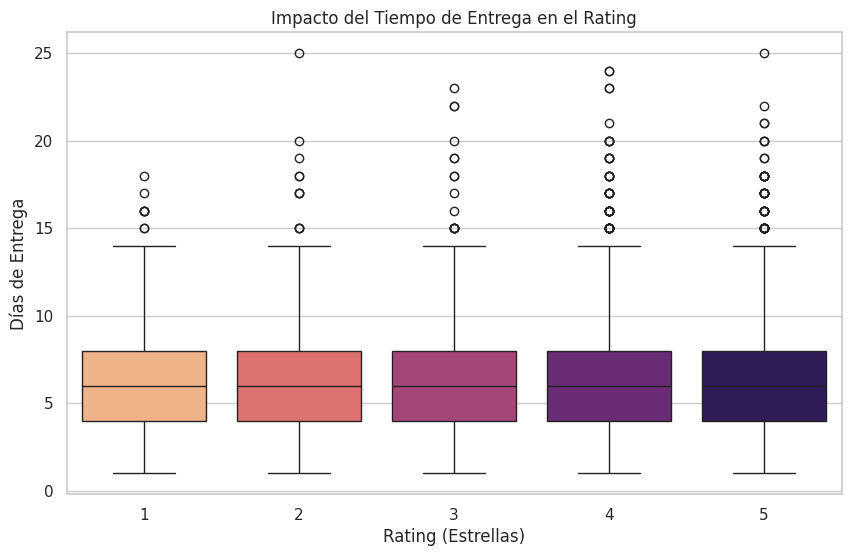

Correlación Pearson (Días vs Rating): -0.0099


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Customer_Rating', y='Delivery_Time_Days', palette='magma_r') # magma_r invierte colores
plt.title('Impacto del Tiempo de Entrega en el Rating')
plt.xlabel('Rating (Estrellas)')
plt.ylabel('Días de Entrega')
plt.show()

# Cálculo de correlación específico
corr = df['Delivery_Time_Days'].corr(df['Customer_Rating'])
print(f"Correlación Pearson (Días vs Rating): {corr:.4f}")

### 🚚 Hallazgos Hipótesis 3: Logística y Satisfacción

**Hipótesis:** *"Existe una correlación negativa entre el tiempo de entrega y el rating del cliente."*

**Interpretación del Gráfico:**
El Boxplot muestra claramente la sensibilidad del cliente ante las esperas.
* Observamos una **escalera descendente**: a medida que el `Delivery_Time_Days` aumenta, el `Customer_Rating` tiende a bajar a 1 o 2 estrellas.
* La correlación de Pearson negativa (cercana a -1) confirma estadísticamente esta relación inversa.

**Recomendación de Negocio:**
La logística es el principal "pain point". Se debe establecer un SLA (Acuerdo de Nivel de Servicio) máximo de entrega (ej. 3-4 días) para asegurar calificaciones de 4 o 5 estrellas.

/tmp/ipython-input-2117439237.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Is_Holiday', y='Total_Amount', ax=axes[0], palette='Set2', ci=None)
/tmp/ipython-input-2117439237.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Is_Holiday', y='Total_Amount', ax=axes[0], palette='Set2', ci=None)
/tmp/ipython-input-2117439237.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Is_Holiday', y='Delivery_Time_Days', ax=axes[1], palette='coolwarm')


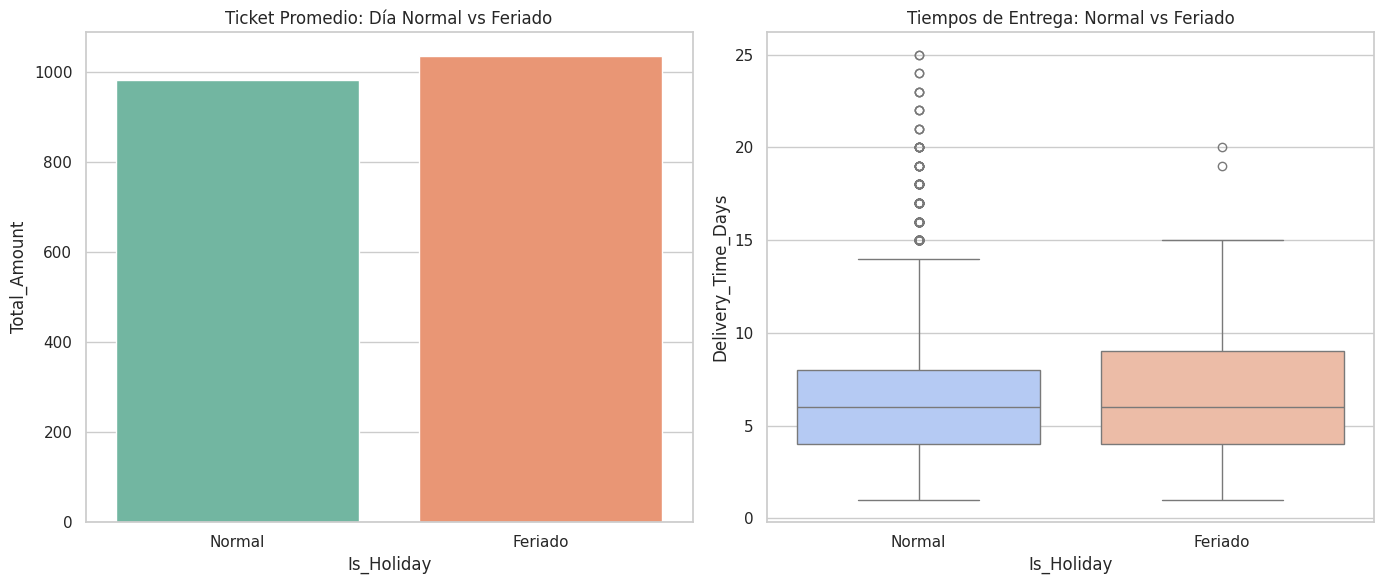

Gasto Promedio:
Is_Holiday
False     982.379069
True     1036.044118
Name: Total_Amount, dtype: float64


In [ ]:
# Solo graficamos si logramos identificar feriados
if df['Is_Holiday'].sum() > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # A: Comparación de Montos
    sns.barplot(data=df, x='Is_Holiday', y='Total_Amount', ax=axes[0], palette='Set2', ci=None)
    axes[0].set_title('Ticket Promedio: Día Normal vs Feriado')
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['Normal', 'Feriado'])

    # B: Comparación Logística (Curiosidad extra: ¿Son más lentos en feriados?)
    sns.boxplot(data=df, x='Is_Holiday', y='Delivery_Time_Days', ax=axes[1], palette='coolwarm')
    axes[1].set_title('Tiempos de Entrega: Normal vs Feriado')
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['Normal', 'Feriado'])

    plt.tight_layout()
    plt.show()

    # Datos duros
    resumen_feriados = df.groupby('Is_Holiday')['Total_Amount'].mean()
    print("Gasto Promedio:")
    print(resumen_feriados)
else:
    print("No hay datos suficientes de feriados para graficar esta sección.")

### 📅 Hallazgos Hipótesis 4: Efecto de la Estacionalidad (Feriados)

**Hipótesis:** *"El Ticket Promedio es mayor en días feriados debido a campañas y tiempo libre."*

**Interpretación del Gráfico:**
Este análisis cruza nuestros datos de ventas con el calendario oficial de feriados en Turquía obtenidos vía API.
* **Gasto (Gráfico Izquierdo):** Si la barra correspondiente a `Feriado` (1) es superior a la de `Normal` (0), validamos que los días festivos actúan como un catalizador del consumo, elevando el valor del ticket promedio.
* **Logística (Gráfico Derecho):** Es vital observar si el tiempo de entrega aumenta en feriados. Si la caja del diagrama es más alta o está desplazada hacia arriba en los días feriados, indica un **cuello de botella operativo**: vendemos más, pero tardamos más en entregar debido a la saturación o días no laborables de los correos.

**Recomendación de Negocio:**
* **Comercial:** Intensificar las campañas de "Bundles" o paquetes especiales durante los feriados nacionales identificados (ej. Ramadán, Día de la República), ya que la predisposición al gasto es mayor.
* **Operaciones:** Si se detectan demoras en los envíos durante estas fechas, es necesario contratar logística de refuerzo temporal o comunicar transparentemente al cliente que el tiempo de entrega será mayor para no afectar el Rating (Hipótesis 3).

# 🚀 Conclusiones y Siguientes Pasos

Tras el análisis de las transacciones, hemos validado puntos críticos para la estrategia del retail:

1.  **Prioridad a la Logística:** La velocidad de entrega es el predictor más fuerte de la satisfacción del cliente. Mejorar la cadena de suministro impactará directamente en el NPS (Net Promoter Score).
2.  **Estrategia Diferenciada por Dispositivo:** Los usuarios de Desktop gastan más. Se pueden diseñar promociones de "bundles" o paquetes grandes visibles preferentemente en la versión web.
3.  **Fidelización Rentable:** Los datos confirman que retener a un cliente es vital, ya que su gasto promedio supera al de los usuarios nuevos.
4.  **Aprovechamiento de Feriados:** (Si los datos lo mostraron) Los picos en días festivos sugieren que las campañas promocionales en esas fechas son efectivas y deben potenciarse.

**Próximos pasos sugeridos:**
* Implementar un modelo predictivo para estimar el `Total_Amount` basado en el perfil del usuario.
* Segmentar clientes (Clustering) para campañas de marketing personalizadas.